<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/image_classification/homer_bart_classifiction_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homer/Bart image classification with feature extraction

### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import save_model

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

tf.__version__

Mounted at /content/drive


'2.15.0'

In [3]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/cv_common.ipynb'

Common library was successfully loaded


### Loading the images

In [4]:
zip_file_path = f'{datasets_directory}/Simpsons/simpsons.zip'
working_directory = './content/simpsons'
data_extract_path = f'{working_directory}/datasets'
train_set_path = f'{data_extract_path}/simpsons/training_set'
test_set_path = f'{data_extract_path}/simpsons/test_set'
model_directory = f'{working_directory}/models'

In [5]:
zip_object = zipfile.ZipFile(file=zip_file_path, mode='r')
zip_object.extractall(data_extract_path)
zip_object.close()

In [6]:
# Create training set generation, in order to provide training image augmentation
# Image augmentation transformations are Rescalling/Rotation/Horizontal Flip/Zoom In or Out
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

#Loading and transforming image training set
# 1) Resizing all images to 64*64 size
# 2) Shuffling and spliting to baches
train_dataset = training_generator.flow_from_directory(train_set_path,
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)
train_dataset.classes

Found 196 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [7]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [8]:
# Create testing set generator.
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(test_set_path,
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 73 images belonging to 2 classes.


## Building and training the neural network

In [9]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [10]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [11]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50


<ipython-input-12-70460a0dc6fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)


25/25 [==============================] - 8s 108ms/step - loss: 0.7895 - accuracy: 0.5765 - val_loss: 0.6226 - val_accuracy: 0.5890
Epoch 2/50
25/25 [==============================] - 1s 28ms/step - loss: 0.6005 - accuracy: 0.6378 - val_loss: 0.5627 - val_accuracy: 0.6301
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 0.5689 - accuracy: 0.6684 - val_loss: 0.6538 - val_accuracy: 0.5753
Epoch 4/50
25/25 [==============================] - 1s 38ms/step - loss: 0.4988 - accuracy: 0.7806 - val_loss: 0.4412 - val_accuracy: 0.8904
Epoch 5/50
25/25 [==============================] - 1s 56ms/step - loss: 0.4001 - accuracy: 0.7908 - val_loss: 0.6996 - val_accuracy: 0.7534
Epoch 6/50
25/25 [==============================] - 1s 28ms/step - loss: 0.4404 - accuracy: 0.7806 - val_loss: 0.4268 - val_accuracy: 0.7671
Epoch 7/50
25/25 [==============================] - 1s 27ms/step - loss: 0.3654 - accuracy: 0.8316 - val_loss: 0.2561 - val_accuracy: 0.8767
Epoch 8/50
25/25 [=====

## Evaluating the neural network

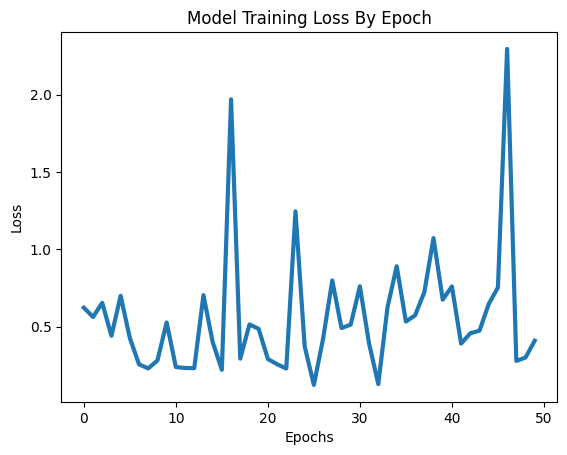

In [13]:
plt.plot(history.history['val_loss'], linewidth=3)
plt.title('Model Training Loss By Epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

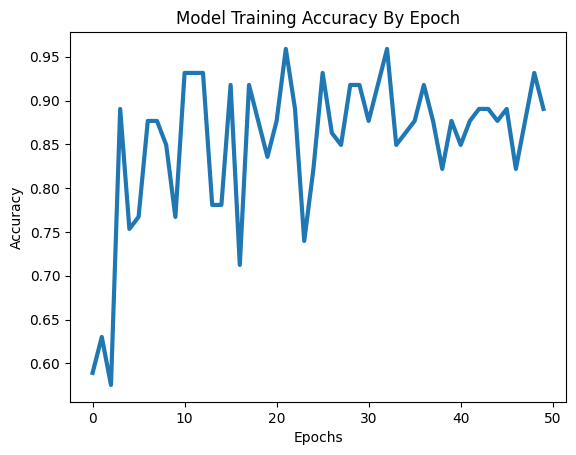

In [28]:
plt.plot(history.history['val_accuracy'], linewidth=3)
plt.title('Model Training Accuracy By Epoch')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [15]:
predictions = network.predict(test_dataset)
predictions = np.argmax(predictions, axis = 1)
predictions

73/73 [==============================] - 0s 3ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [16]:
accuracy_score(test_dataset.classes, predictions)

0.8904109589041096

<Axes: >

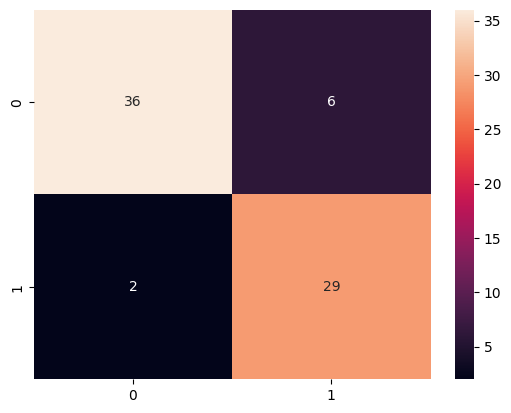

In [17]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [18]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        42
           1       0.83      0.94      0.88        31

    accuracy                           0.89        73
   macro avg       0.89      0.90      0.89        73
weighted avg       0.90      0.89      0.89        73



## Saving and loading the model

In [19]:
create_empty_directory(model_directory)
model_json = network.to_json()
with open(f'{model_directory}/network.json','w') as json_file:
  json_file.write(model_json)

./content/simpsons/models directory was created


In [20]:
network_saved = save_model(network, f'{model_directory}/weights.hdf5')

<ipython-input-20-607e19d7058f>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, f'{model_directory}/weights.hdf5')


In [21]:
with open(f'{model_directory}/network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bia

In [22]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights(f'{model_directory}/weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

### Classifying one single image

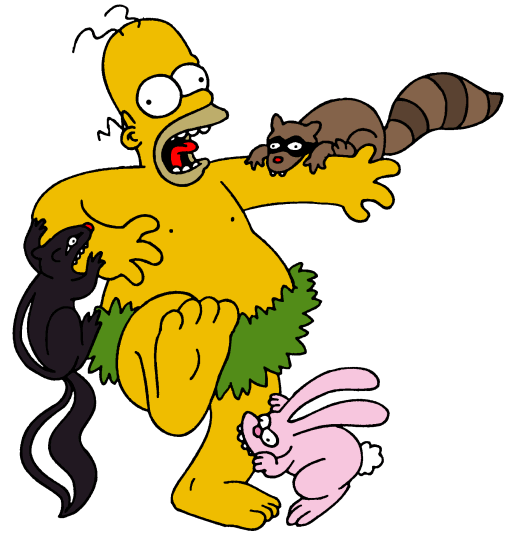

In [24]:
image = cv2.imread(f'{test_set_path}/homer/homer15.bmp')
cv2_imshow(image)

In [25]:
image = cv2.resize(image, (64, 64))
image = image / 255
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [26]:
result = network_loaded(image)
result = np.argmax(result)
result

0

In [27]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Bart
